In [2]:
import glob
import zipfile
import os
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [ ]:
with zipfile.ZipFile("202405.zip", "r") as zfile:
    zfile.extractall()
os.remove("202405.zip")

In [ ]:
files = glob.glob("F:/python basic/dataAnalysis/project/202405/2024*.zip")

for file in files:
    extraction_path = f"F:/python basic/dataAnalysis/project/202405/{os.path.splitext(os.path.basename(file))[0]}/"
    with zipfile.ZipFile(file, "r") as zfile2:
        zfile2.extractall(extraction_path)
    os.remove(file)

In [4]:
#Q1
match_away_team_info = pd.read_csv('df/df_away_team_1.csv').drop_duplicates(subset='match_id', keep='first')
match_home_team_info = pd.read_csv('df/df_home_team_1.csv').drop_duplicates(subset='match_id', keep='first')
total_team_info = pd.merge(match_away_team_info, match_home_team_info, how='outer')
total_team_info['player_id'].nunique()

2352

In [28]:
#Q2
total_team_info['height'].mean()

np.float64(1.8194051990013218)

In [45]:
#Q4
match_time_info = pd.read_csv('df/df_time.csv').drop_duplicates(subset='match_id', keep='first')
match_time_info['Total'] = match_time_info.iloc[:, 1:5].sum(axis=1)
match_time_info.loc[match_time_info['Total'].idxmax(), 'match_id']

np.int64(12346747)

In [17]:
#Q5
organized_game_info = pd.read_csv('df/df_pbp.csv').groupby(['match_id', 'game_id'])['set_id'].max().reset_index()
organized_game_info['set_id'].value_counts()

set_id
2    43965
3    15940
1     7054
4      289
5      202
Name: count, dtype: int64

In [11]:
#Q6
organized_team_info = total_team_info.drop_duplicates(subset='player_id', keep='first').groupby('country')['total_prize'].mean().reset_index()
organized_team_info.sort_values(ascending=False,by = 'total_prize')

,country,total_prize
76,Serbia,3.962385e+06
7,Belarus,3.408318e+06
87,Tunisia,2.791494e+06
81,Spain,2.358158e+06
32,Greece,2.199077e+06
...,...,...
63,Nigeria,5.020500e+03
48,Kyrgyzstan,4.413000e+03
61,New Caledonia,3.149000e+03
37,Iran,2.980000e+03


In [13]:
#Q7
period_info = pd.read_csv('df/df_statistics.csv')
period_info.groupby('match_id')['statistic_name'].apply(lambda x: (x == 'aces').sum()).mean()

np.float64(6.49257025158158)

In [14]:
#Q8
organized_period_info = period_info.groupby('match_id')['statistic_name'].apply(lambda x: (x == 'double_faults').sum()).reset_index(name='double_faults')
pd.merge(match_away_team_info, organized_period_info, how='outer').groupby('gender')['double_faults'].mean()

gender
F    6.416489
M    6.624333
Name: double_faults, dtype: float64

In [60]:
#Q10
total_team_info = pd.merge(match_away_team_info, match_home_team_info, how='outer')
total_team_info['height'].corr(total_team_info['total_prize'])

np.float64(0.026991266496057816)

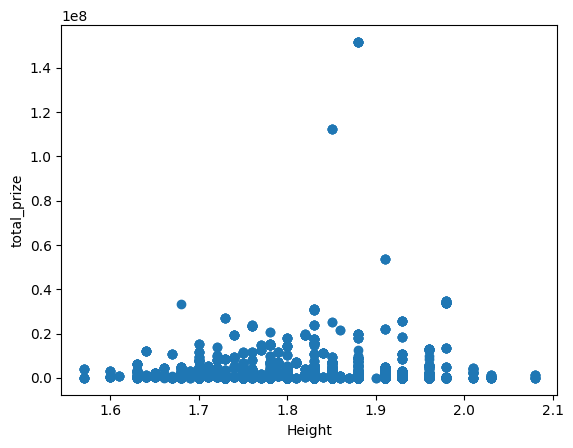

In [61]:
plt.scatter(total_team_info['height'], total_team_info['total_prize'])
plt.xlabel('Height')
plt.ylabel('total_prize')
plt.show()

In [127]:
#Q11
match_time_info[match_time_info['Total'] != 0]['Total'].mean()

np.float64(7331.208374223094)

In [136]:
#Q12
organized_game_info_2 = game_info.groupby(['match_id', 'set_id'])['game_id'].mean().reset_index(name='mean_game_id')
pd.merge(match_away_team_info, organized_game_info_2, how='outer').groupby('gender')['mean_game_id'].mean()

gender
F    5.037571
M    5.211970
Name: mean_game_id, dtype: float64

In [15]:
#Q14
pd.read_csv('df/df_tournament.csv').drop_duplicates(subset='tournament_id', keep='first').groupby('ground_type')['tournament_id'].count().reset_index()

,ground_type,tournament_id
0,Hardcourt indoor,4
1,Hardcourt outdoor,75
2,Red clay,213
3,Synthetic outdoor,2


In [5]:
#Q15
match_venue_info = pd.read_csv('df/df_venue.csv').drop_duplicates(subset='match_id', keep='first')
a = pd.merge(match_away_team_info, match_home_team_info, how='outer', on='country')
pd.merge(a, match_venue_info, how='outer', on='country')


In [23]:
b = a['residence_x'].unique()
import pycountry

# Sample array

# Obtain the unique countries
unique_countries = []
for place in b:
    if isinstance(place, str):
        if ',' in place:
            country = place.split(',')[-1].strip()
            unique_countries.append(country)
        else:
            # Use pycountry to handle country names
            try:
                country = pycountry.countries.lookup(place)
                unique_countries.append(country.name)
            except LookupError:
                pass

# Remove duplicate countries
unique_countries = list(set(unique_countries))

# Print the list of unique countries
print(unique_countries)

['Isle of Man', 'Taiwan, Province of China', 'Japan', 'Bosnia & Herzegovina', 'SC', 'Russian Federation', 'Israel', 'The Netherlands', 'Mexico', 'South Africa', 'Chile', 'Buenos Aires', 'Taiwan', 'Portugal', 'Florida', 'South Korea', 'Poland', 'Estonia', 'Colombia', 'Fl. USA', 'Scotland', 'Kazakhstan', 'New Zealand', 'OH', 'USA', 'Dominican Republic', 'Russia', 'CA', 'Netherlands', 'Bolivia', 'Croatia', 'Georgia', 'Finland', 'Korea', 'India', 'Chinese Taipei', 'Monaco', 'CZE', 'Peru', 'France', 'Romania', 'Austria', 'United States', 'Oklahoma', 'Hungary', 'Bulgaria', 'Moldova', 'Fl', 'Italy', 'Norway', 'Czechia', 'Qatar', 'Gernany', 'Slovakia', 'Tunisia', 'Spain', 'Andorra', 'BRAZIL', 'Germany', 'Australia', 'Brazil', 'Belgium', 'New Caledonia', 'England', 'Sweden', 'Ukraine', 'Cascais', 'Switzerland', 'Argentina', 'FL', 'Minsk', 'Uzbekistan', 'China', 'Cyprus', 'Serbia', 'UAE', 'Turkey', 'Canada', 'Egypt', 'Denmark', 'Latvia', 'Belarus', 'Bosnia-Herzegovina', 'Malta', 'Lithuania', 'Br

In [24]:
c = a['residence_y'].unique()
import pycountry

# Obtain the unique countries
unique_countries = []
for place in c:
    if isinstance(place, str):
        if ',' in place:
            country = place.split(',')[-1].strip()
            unique_countries.append(country)
        else:
            # Use pycountry to handle country names
            try:
                country = pycountry.countries.lookup(place)
                unique_countries.append(country.name)
            except LookupError:
                pass

# Remove duplicate countries
unique_countries_2 = list(set(unique_countries))

# Print the list of unique countries
print(unique_countries) 

['Argentina', 'Andorra', 'Argentina', 'Buenos Aires', 'Buenos Aires', 'Argentina', 'Argentina', 'Argentina', 'Australia', 'Australia', 'Australia', 'Australia', 'Russia', 'Australia', 'Australia', 'Australia', 'Australia', 'Spain', 'Monaco', 'Australia', 'Australia', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Austria', 'Belarus', 'Minsk', 'Belgium', 'Belgium', 'Belgium', 'Belgium', 'Bolivia', 'Bosnia & Herzegovina', 'Bosnia-Herzegovina', 'Brazil', 'Brazil', 'Brazil', 'Brazil', '264', 'USA', 'Spain', 'Brazil', 'SP', 'Bulgaria', 'Bulgaria', 'Bulgaria', 'Canada', 'Bahamas', 'Canada', 'Canada', 'Canada', 'Bahamas', 'Chile', 'Chile', 'China', 'China', 'China', 'China', 'China', 'Taiwan', 'Chinese Taipei', 'Taiwan, Province of China', 'Colombia', 'USA', 'Colombia', 'Bahamas', 'Croatia', 'Czech Republic', 'Czech Republic', 'Czechia', 'Czechia', 'UAE', 'Czech Republic', 'Czechia', 'CZE', 'CZE', 'Czech Republic', 'USA', 'Czech Republic', 'Czech Republic', 'Dominican Repu

In [30]:
import numpy as np
np.set_printoptions(threshold=np.inf)
print(list(set(unique_countries + unique_countries_2)))


['Isle of Man', 'Taiwan, Province of China', 'Japan', 'Slovenia', 'Bosnia & Herzegovina', 'SC', 'Luxembourg', 'Russian Federation', 'Israel', 'The Netherlands', 'Mexico', 'South Africa', 'SP', 'Chile', 'Buenos Aires', 'Taiwan', 'Portugal', 'Florida', 'South Korea', 'Poland', 'Colombia', 'Fl. USA', 'Scotland', 'Kazakhstan', 'New Zealand', 'OH', 'USA', 'Dominican Republic', 'Russia', 'Netherlands', 'Bolivia', 'Croatia', 'Georgia', 'IA', 'Finland', 'Korea', 'India', 'Chinese Taipei', 'Monaco', 'CZE', 'Peru', 'France', 'Romania', 'Austria', 'United States', 'Oklahoma', 'Hungary', 'Bulgaria', 'Moldova', 'Fl', 'Italy', 'Czechia', 'Qatar', 'Gernany', 'Slovakia', 'Tunisia', 'Spain', 'Andorra', 'Germany', 'Australia', 'Brazil', 'Belgium', 'New Caledonia', 'England', 'Sweden', 'Ukraine', 'Switzerland', 'Argentina', 'FL', 'Minsk', 'Uzbekistan', 'China', 'Cyprus', 'Serbia', 'UAE', 'Turkey', 'Canada', 'Egypt', 'Latvia', 'Belarus', 'Bosnia-Herzegovina', 'Malta', 'Lithuania', 'Great Britain', '264', 

In [57]:
#Q17
period_info = pd.read_csv('df/df_statistics.csv')
organized_period_info = period_info[period_info['statistic_name'] == 'break_points_converted'].groupby('match_id').size().reset_index(name='total')
organized_period_info['total'].mean()

np.float64(6.49257025158158)